## Inteligencia Artificial 2022

#### Alan Reyes-Figueroa

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def relu(x):
    return x*(x>0)

In [3]:
def basef(x, x0, h=1.0, kernel='tophat'):
    if (kernel == 'tophat'):
        f = (np.abs(x-x0) < h).astype(type(x[0]))
    elif (kernel == 'gaussian'):
        f = np.exp(-(x-x0)**2/ (2.*h**2))
    elif (kernel == 'laplacian'):
        f = np.exp(-np.abs(x-x0)/h)
    elif (kernel == 'linear'):
        f = relu(1. - np.abs((x-x0)/h))
    elif (kernel == 'cosine'):
        f = (np.abs(x-x0)<h)*np.cos((x-x0)*np.pi/(2.*h))
    elif (kernel == 'epanechnikov'):
        f = relu(1. - (x-x0)**2/(h**2))
    else: 
        f = 0.*x
    return f

In [4]:
x = np.linspace(-10, 10., 201)

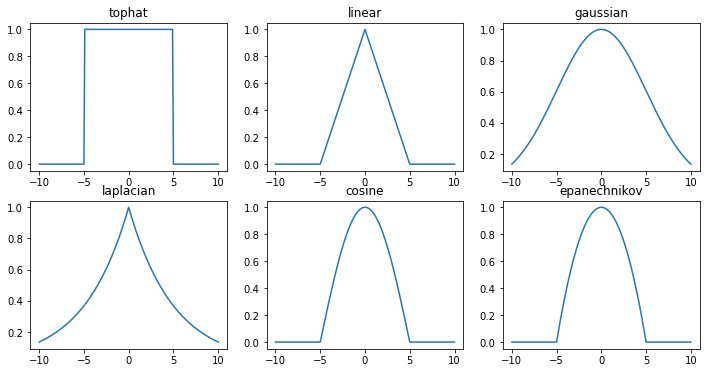

In [5]:
x = np.linspace(-10, 10., 201)
kernels = ['tophat', 'linear', 'gaussian', 'laplacian', 'cosine', 'epanechnikov']
x0 = 0.
h = 5.

plt.figure(figsize=(12,6))
for i in range(0, 6):
    plt.subplot(2,3,i+1)
    y = basef(x, x0, h=h, kernel=kernels[i])
    plt.plot(x, y)
    plt.title(kernels[i])
plt.show()

## Random data

In [6]:
data = np.random.normal(0., 1., (100,)) + 0.2*np.random.normal(7., 5., (100,))
data.shape

(100,)

In [7]:
np.round(data, 3)[:25]

array([ 3.112,  3.265, -0.092,  0.365,  1.232, -0.567,  0.752,  2.071,
        0.91 ,  4.23 ,  1.511,  1.922,  2.264, -0.239,  0.084,  2.623,
        1.438,  1.386,  2.249,  0.521,  3.586,  0.22 ,  2.339,  0.891,
        1.554])

In [8]:
def density(x, n=100, h=1., kernel='tophat'):
    std = x.std()
    minn = x.min() - 2.*std
    maxx = x.max() + 2.*std
    t = np.linspace(minn, maxx, n+1)
    dens = np.zeros(t.shape)
    for i in range(0, x.shape[0]):
        dens = dens + basef(t, x0=x[i], h=h, kernel=kernel)
    dens = dens/x.shape[0]
    return t, dens

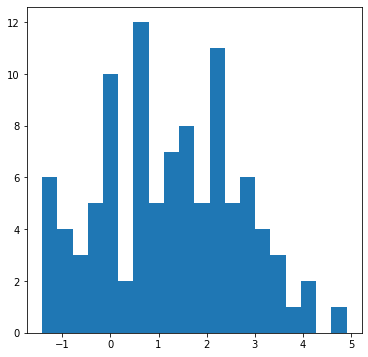

In [9]:
plt.figure(figsize=(6,6))
plt.hist(data, bins=data.shape[0]//5)
plt.show()

In [10]:
t, d = density(data, n=200, h=5., kernel='tophat')

<function matplotlib.pyplot.show(close=None, block=None)>

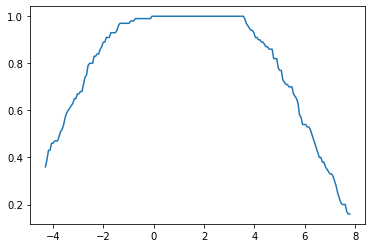

In [11]:
plt.figure()
plt.plot(t, d)
plt.show

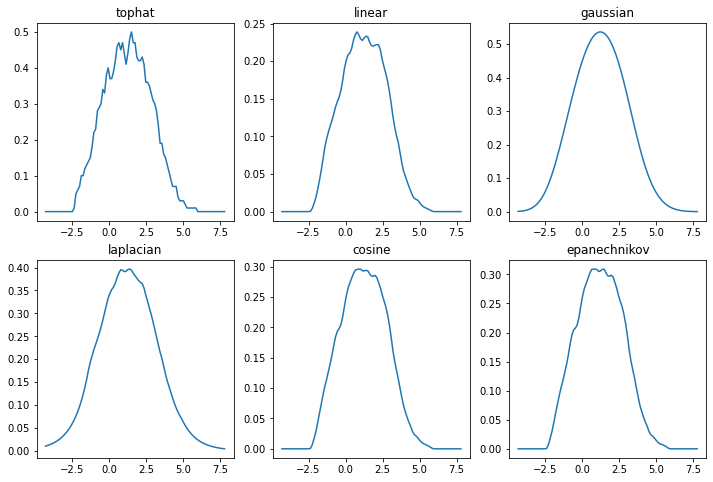

In [12]:
kernels = ['tophat', 'linear', 'gaussian', 'laplacian', 'cosine', 'epanechnikov']
n = 100
h = 1.

plt.figure(figsize=(12,8))
for i in range(0, 6):
    plt.subplot(2,3,i+1)
    t, d = density(data, n=n, h=h, kernel=kernels[i])
    plt.plot(t, d)
    plt.title(kernels[i])
plt.show()

## Scikit-learn

In [13]:
from sklearn.neighbors import KernelDensity
from scipy.stats import norm

In [14]:
# Plot a 1D density example
N = 100
np.random.seed(1)
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

In [15]:
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

In [16]:
true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

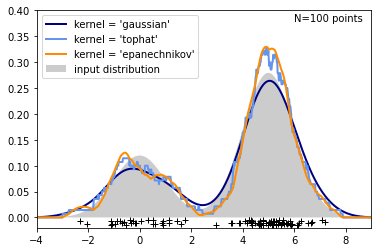

In [17]:
fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')
colors = ['navy', 'cornflowerblue', 'darkorange']
kernels = ['gaussian', 'tophat', 'epanechnikov']
lw = 2

for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=.7).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), color=color, lw=lw,
            linestyle='-', label="kernel = '{0}'".format(kernel))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()

In [18]:
import seaborn as sns

C:\Users\61292\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


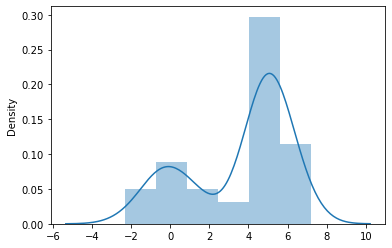

In [19]:
plt.figure()
sns.distplot(X, kde=True)
plt.show()

## Aproximación de funciones

In [20]:
x = np.linspace(0, 10, 101)

In [21]:
m = 12    # número de kernels aproximantes

centers = np.linspace(0.5, 9.5, m)
centers

array([0.5       , 1.31818182, 2.13636364, 2.95454545, 3.77272727,
       4.59090909, 5.40909091, 6.22727273, 7.04545455, 7.86363636,
       8.68181818, 9.5       ])

In [22]:
#f = 0.75*np.cos(1.7*x) + 1.3*np.cos(1.1*x) + 0.5*np.sin(0.1*x)

f = 1.*np.cos(2.7*x) + 1.7*np.cos(1.35*x) + 0.5*np.sin(2.1*x)

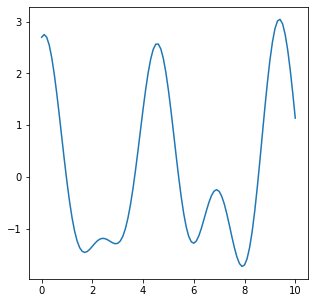

In [23]:
plt.figure(figsize=(5,5))
plt.plot(x, f)
plt.show()

In [24]:
n = x.shape[0]
d = centers.shape[0]
print(n, d)

101 12


In [25]:
X = np.zeros((d, n))
sigma = 1.

for i in range(0, d):
    X[i,:] = basef(x, centers[i], h=sigma, kernel='gaussian')

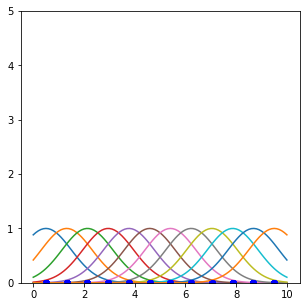

In [26]:
plt.figure(figsize=(5,5))
for i in range(0, d):
    plt.plot(x, X[i])
    plt.plot(centers, np.zeros(len(centers)), 'bo')
    plt.ylim([0, 5])
plt.show()

In [27]:
y = X @ f
a = np.linalg.inv(X@(X.T)) @ y

In [28]:
a

array([  7.7441115 , -10.65291193,   7.08614097,  -2.9606186 ,
        -4.0394994 ,   7.01993735,   3.74093191, -19.32232467,
        29.1200083 , -30.01174335,  18.47964494,  -3.95364051])

In [29]:
f.shape

(101,)

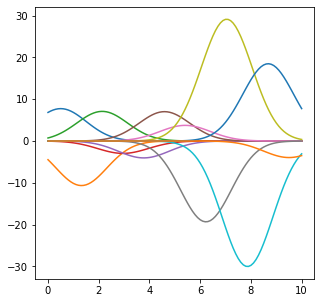

In [30]:
plt.figure(figsize=(5,5))
for i in range(0, d):
    plt.plot(x, a[i]*X[i])
plt.show()

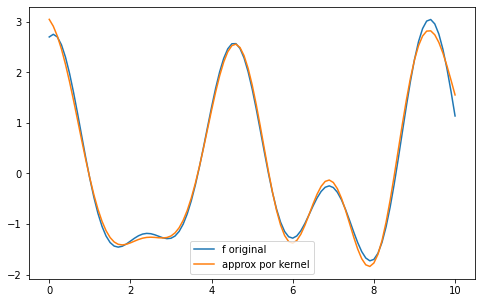

In [31]:
plt.figure(figsize=(8,5))
plt.plot(x, f, label='f original')
plt.plot(x, X.T@a, label='approx por kernel')
plt.legend()
plt.show()